In [5]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [6]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# Creating an engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# Reflecting an existing database into a new model.
Base=automap_base()

# Reflecting the tables.
Base.prepare(engine, reflect=True)


In [10]:
# Viewing all of the classes that automap found.
Base.classes.keys()



['measurement', 'station']

In [11]:
# Saving references to each table.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Creating our session (link) from Python to the database.
session = Session(engine)


# Exploratory Precipitation Analysis

In [13]:
# Finding the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [14]:
# Designing a query to retrieve the last 12 months of precipitation data and plot the results. 
# (look are cell below for the query above.)

# Starting from the most recent data point in the database. 

# Calculating the date one year from the last date in data set.

one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year

datetime.date(2016, 8, 23)

In [15]:
# Designing a query to retrieve the last 12 months of precipitation data and plot the results. 

precip_data = session.query(Measurement.date, Measurement.prcp)
precip_data

In [16]:
# Performing a query to retrieve the data and precipitation scores.

total_scores = session.query(Measurement.date, Measurement.prcp)

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(precip_data, columns=["Date", "Precipitation"])
precip_df.set_index("Date", inplace=True)


In [18]:
# Sort the dataframe by date

precip_df.head()

,Precipitation
Date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


AttributeError: 'Line2D' object has no property 'title'

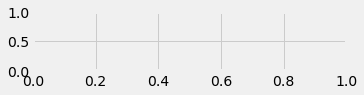

In [19]:
# Using Pandas Plotting with Matplotlib to plot the data.

precip_df.plot(Title="Precipitation Analysis", figsize=(5,1))
plt.legend(loc='upper center')

plt.show()

In [2]:
# Using Pandas to calcualte the summary statistics for the precipitation data.


# Exploratory Station Analysis

In [22]:
# Designing a query to calculate the total number stations in the dataset.

total_stations = session.query(Measurement.station).distinct().count()
total_stations

9

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# Listing the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc().all())
most_active_stations


AttributeError: Neither 'UnaryExpression' object nor 'Comparator' object has an attribute 'all'

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()